In [1]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import pandas as pd
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.utils import class_weight
import random
from keras import backend as K

# Import model

In [2]:
# import keras
from tensorflow.keras.models import load_model

# Specify the path to the saved model file
model_path = r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\models_new\ra_unet_nbr_2.h5"

# Load the model
model = load_model(model_path, compile=False)

# Test #1

In [3]:
test_images = []
image_names = glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\256\testing_image\images/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
    tiff_image = gdal.Open(img_path, 0)
    band7 = tiff_image.GetRasterBand(7).ReadAsArray()
    band8 = tiff_image.GetRasterBand(8).ReadAsArray()
    band9 = tiff_image.GetRasterBand(9).ReadAsArray()

    X = np.stack((band9, band8, band7), axis=-1)
    
    test_images.append(X)

test_images = np.array(test_images)
print(np.mean(test_images))
# normalize
# test_images = test_images / (2**16-1)
# test_images = test_images.astype(int)

# low, high = np.percentile(X, (2, 98))
# test_images = (test_images-low)/(high-low)
print(test_images.shape)

test_masks = []
image_names = glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\mask\ps\multi\truth_2\test\images/*.tif")
#"/content/drive/MyDrive/Colab Notebooks/Deep_learning/256/ps/test_threshold_3/images/*.tif"
image_names.sort()
for img_path in image_names:
  #  print(img_path)
    tiff_image = gdal.Open(img_path, 0)
    band1 = tiff_image.GetRasterBand(1).ReadAsArray()
    test_masks.append(band1)

test_masks = np.array(test_masks)
# test_masks = test_masks
# masks = train_masks.astype(int)
print(np.unique(test_masks))

y_test_cat = to_categorical(test_masks, num_classes=4)
y_test_cat = y_test_cat.astype(int)
print(y_test_cat.shape)
print(np.unique(y_test_cat))

test_images_pre = []
image_names = glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\256\pre\testing\images/*.tif")
image_names.sort()
for img_path in image_names:
    # print(img_path)
    tiff_image = gdal.Open(img_path, 0)
    band7 = tiff_image.GetRasterBand(7).ReadAsArray()
    band8 = tiff_image.GetRasterBand(8).ReadAsArray()
    band9 = tiff_image.GetRasterBand(9).ReadAsArray()

    X = np.stack((band9, band8, band7), axis=-1)
    test_images_pre.append(X)

test_images_pre = np.array(test_images_pre)
print(np.mean(test_images_pre))
# normalize
# test_images_pre = test_images / (2**16-1)
# test_images_pre = test_images_pre.astype(int)

# low, high = np.percentile(X, (2, 98))
# test_images_pre = (test_images_pre)/(high-low)
print(test_images_pre.shape)

test_images_nbr = []
image_names = glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\mask\ps\NBR\test\images/*.tif")
image_names.sort()
for img_path in image_names:
    # print(img_path)
    tiff_image = gdal.Open(img_path, 0)
    band1 = tiff_image.GetRasterBand(1).ReadAsArray()
    band2 = tiff_image.GetRasterBand(2).ReadAsArray()
    band3 = tiff_image.GetRasterBand(3).ReadAsArray()

    X = np.stack((band1, band2, band3), axis=-1)
    test_images_nbr.append(X)

test_images_nbr = np.array(test_images_nbr)

# test_images_nbr = test_images_nbr / (2**16-1)
# test_images_nbr = test_images_nbr / np.max(test_images_nbr)
test_images_nbr = np.where(test_images_nbr < 0, 0, test_images_nbr)
print(np.mean(test_images_nbr))

C:\Users\wumin\anaconda3\envs\deep_learning\lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


1314.3571367617008
(36, 256, 256, 3)
[0 1 2 3]
(36, 256, 256, 4)
[0 1]
1314.3589101720738
(36, 256, 256, 3)
3.1644802


In [4]:
test_list = [test_images, test_images_pre, test_images_nbr]
# test_list = [test_images, test_images_pre]
# test_list = [test_images]

In [5]:
print(test_images.shape)
print(test_images_pre.shape)
print(test_images_nbr.shape)

(36, 256, 256, 3)
(36, 256, 256, 3)
(36, 256, 256, 3)


In [17]:
test_images_pred = np.expand_dims(test_images[19], 0)
test_images_pre_pred = np.expand_dims(test_images_pre[19], 0)
test_images_nbr_pred = np.expand_dims(test_images_nbr[19], 0)
print(test_images_pred.shape)
map_list = [test_images_pred, test_images_pre_pred, test_images_nbr_pred]

(1, 256, 256, 3)


In [7]:
# from sklearn.metrics import classification_report
# from sklearn import metrics
# import tensorflow as tf
# predicted = np.expand_dims(test_images, 0)
# prediction = (model.predict(test_list))
# print(prediction.shape)
# predicted_img = np.argmax(prediction, axis=3)[:,:,:]
# y_test_pred = test_masks
# # print(y_test.shape)
# print(predicted_img.shape)
# cm = metrics.confusion_matrix(y_test_pred.reshape(-1), predicted_img.reshape(-1))
# print(cm, "\n")
# print(classification_report(y_test_pred.reshape(-1), predicted_img.reshape(-1), digits=4))
# 
# from keras.metrics import MeanIoU
# IOU_keras = MeanIoU(num_classes=4)
# IOU_keras.update_state(y_test_pred.reshape(-1), predicted_img.reshape(-1))
# print("Mean IoU = ", IOU_keras.result().numpy())
# values = np.array(IOU_keras.get_weights()).reshape(4, 4)
# class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0] + values[2,0] + values[3,0])
# class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1] + values[2,1] + values[3,1])
# class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2] + values[1,2] + values[3,2])
# class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3] + values[1,3] + values[2,3])
# print("class1 IoU = ", class1_IoU)
# print("class2 IoU = ", class2_IoU)
# print("class3 IoU = ", class3_IoU)
# print("class4 IoU = ", class4_IoU)
# 
# m = tf.keras.metrics.Accuracy()
# m.update_state(y_test_pred.reshape(-1), predicted_img.reshape(-1))
# print('\n', 'Accuracy = ', m.result().numpy())
# 
# from sklearn.metrics import cohen_kappa_score
# kappa_score = cohen_kappa_score(y_test_pred.reshape(-1), predicted_img.reshape(-1))
# print("Kappa:", kappa_score)

# Predict & Plot

In [30]:
# predicted = np.expand_dims(map_list, 0)
prediction = (model.predict(map_list))
print(prediction.shape)
predicted_img = np.argmax(prediction, axis=3)[:,:,:]
print(predicted_img.shape)
print(np.unique(predicted_img))

1/1 [==============================] - 0s 31ms/step
(1, 256, 256, 4)
(1, 256, 256)
[0 1 2 3]


In [31]:
print(predicted_img[0].shape)

(256, 256)


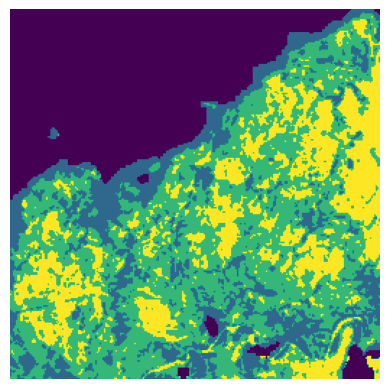

In [32]:
plt.imshow(predicted_img[0])
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

# Create heat map

In [33]:
import tensorflow as tf
import numpy as np
import cv2

print(model.summary())

Model: "Attention_ResUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                 

In [34]:
from tensorflow.keras.models import Model

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [37]:
# initialize our gradient class activation map and build the heatmap
image = map_list
i = predicted_img[0]

cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

ValueError: Exception encountered when calling layer "model_1" "                 f"(type Functional).

Input 0 of layer "batch_normalization" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (3, 1, 256, 256, 16)

Call arguments received by layer "model_1" "                 f"(type Functional):
  • inputs=tf.Tensor(shape=(3, 1, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None

In [41]:
encoder = tf.keras.Model(inputs=model.input, outputs=model.get_layer('activation').output)
features = encoder(map_list)

class_4_prediction = predicted_img[0]
heatmap = class_4_prediction.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [48]:
cam_model = Model(inputs=model.input, outputs=(model.layers[-4].output, model.layers[-1].output))


In [43]:
print(model.layers)

[<keras.engine.input_layer.InputLayer object at 0x0000024C3D8308B0>, <keras.engine.input_layer.InputLayer object at 0x0000024C3D8313F0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000024C3D831720>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000024C3D831990>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000024C3D831ED0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000024C3D832410>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000024C3D832710>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000024C3D832C20>, <keras.layers.core.activation.Activation object at 0x0000024C3D832FE0>, <keras.layers.core.activation.Activation object at 0x0000024C3D833610>, <keras.layers.core.activation.Activation object at 0x0000024C3D8337F0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000024C3D833790>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000024

In [84]:
# Remove the final classification layer (softmax)
from tensorflow import keras

model.layers.pop()
# Create a new model without the classification layer
new_model = keras.Model(inputs=model.inputs, outputs=model.layers[-4].output)
# Get the weights of the final layer
weights = model.layers[-1].get_weights() # delet [0]

# Get the CAM for a specific class (e.g., class 7)
# class_index = 7

# Calculate CAM
last_conv_layer = model.get_layer('conv2d_77')  # Choose the last convolutional layer
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(map_list)
    class_output = predictions
    # class_output = predictions[:, class_index]
# 
grads = tape.gradient(class_output, conv_output)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
# 
# # Resize the heatmap to the original image size
# heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 
# Overlay the heatmap on the original image
# superimposed_img = cv2.addWeighted(cv2.cvtColor(predicted_img[0], cv2.COLOR_BGR2RGB), 0.6, heatmap, 0.4, 0)



In [85]:
heatmap = np.argmax(heatmap, axis=0)
print(heatmap.shape)

(256, 256)


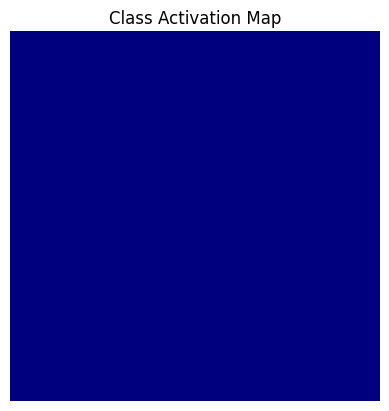

In [86]:
plt.imshow(heatmap, cmap='jet')
plt.title('Class Activation Map')
plt.axis('off')
plt.show()

In [ ]:
# AUC curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
n_classes = 4
confusion_matrix = metrics.confusion_matrix(y_test_pred.reshape(-1), predicted_img.reshape(-1))
y_true = y_test_pred.reshape(-1)
y_true_binary = label_binarize(y_true, classes=np.arange(n_classes))

fpr = [None] * n_classes
tpr = [None] * n_classes
roc_auc = [None] * n_classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], prediction.reshape(2359296, 4)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c']  # Add more colors if needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (One-vs-All)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# print(np.unique(y_test_pred))
# print(np.unique(predicted_img))
print(prediction.reshape(2359296, 4).shape)
print(test_masks.shape)
print(y_true_binary.shape)

Export

In [ ]:
# Export prediction patches
def createGeotiff(out, data, gt, prj):
    driver = gdal.GetDriverByName('GTiff')
    rows, cols = data.shape
    rasterDS = driver.Create(out, cols, rows, 1, gdal.GDT_Int32)
    rasterDS.SetGeoTransform(gt)
    rasterDS.SetProjection(prj)
    band = rasterDS.GetRasterBand(1)
    band.WriteArray(data)
    rasterDS = None

predicted = np.expand_dims(test_list, 0)
prediction = (model.predict(test_list))
print(prediction.shape)
predicted_img = np.argmax(prediction, axis=3)[:,:,:]
print(np.unique(predicted_img))



i = 0
for directory_path in glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\256\testing_image\images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        out = rf"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\models_new\output\FCN\{i:d}.tif"
        ds = gdal.Open(img_path)
        rows = ds.RasterYSize
        cols = ds.RasterXSize
        bands = ds.RasterCount
        gt = ds.GetGeoTransform()
        prj = ds.GetProjectionRef()

        classification = predicted_img[i].reshape((rows,cols))
        createGeotiff(out,classification,gt,prj)

        i = i+1


Test #2

In [ ]:
test_images = []
image_names = glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\256\testing_image\images/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
    tiff_image = gdal.Open(img_path, 0)
    band7 = tiff_image.GetRasterBand(7).ReadAsArray()
    band8 = tiff_image.GetRasterBand(8).ReadAsArray()
    band9 = tiff_image.GetRasterBand(9).ReadAsArray()

    X = np.stack((band9, band8, band7), axis=-1)
    
    test_images.append(X)

test_images = np.array(test_images)
print("mean post", np.mean(test_images))
# normalize
# test_images = test_images / (2**16-1)
# test_images = test_images.astype(int)

# low, high = np.percentile(X, (2, 98))
# test_images = (test_images-low)/(high-low)
print(test_images.shape)

test_masks = []
image_names = glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\mask\ps\multi\truth_2\test\images/*.tif")
#"/content/drive/MyDrive/Colab Notebooks/Deep_learning/256/ps/test_threshold_3/images/*.tif"
image_names.sort()
for img_path in image_names:
  #  print(img_path)
    tiff_image = gdal.Open(img_path, 0)
    band1 = tiff_image.GetRasterBand(1).ReadAsArray()
    test_masks.append(band1)

test_masks = np.array(test_masks)
# test_masks = test_masks
# masks = train_masks.astype(int)
print(np.unique(test_masks))

y_test_cat = to_categorical(test_masks, num_classes=4)
y_test_cat = y_test_cat.astype(int)
print(y_test_cat.shape)
print(np.unique(y_test_cat))

test_images_pre = []
image_names = glob.glob(r"C:\Document\University\2023_Spring_Junior\GEOG_491\Dataset\August_Complex\Deep_learning\256\pre\testing\images/*.tif")
image_names.sort()
for img_path in image_names:
    # print(img_path)
    tiff_image = gdal.Open(img_path, 0)
    band7 = tiff_image.GetRasterBand(7).ReadAsArray()
    band8 = tiff_image.GetRasterBand(8).ReadAsArray()
    band9 = tiff_image.GetRasterBand(9).ReadAsArray()

    X = np.stack((band9, band8, band7), axis=-1)
    test_images_pre.append(X)

test_images_pre = np.array(test_images_pre)
print("mean pre", np.mean(test_images_pre))
# normalize
# test_images_pre = test_images / (2**16-1)
# test_images_pre = test_images_pre.astype(int)

# low, high = np.percentile(X, (2, 98))
# test_images_pre = (test_images_pre)/(high-low)
print(test_images_pre.shape)

In [ ]:
test_list = [test_images, test_images_pre]

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf
predicted = np.expand_dims(test_images, 0)
prediction = (model.predict(test_list))
print(prediction.shape)
predicted_img = np.argmax(prediction, axis=3)[:,:,:]
y_test_pred = test_masks
# print(y_test.shape)
print(predicted_img.shape)
cm = metrics.confusion_matrix(y_test_pred.reshape(-1), predicted_img.reshape(-1))
print(cm, "\n")
print(classification_report(y_test_pred.reshape(-1), predicted_img.reshape(-1), digits=4))

from keras.metrics import MeanIoU
IOU_keras = MeanIoU(num_classes=4)
IOU_keras.update_state(y_test_pred.reshape(-1), predicted_img.reshape(-1))
print("Mean IoU = ", IOU_keras.result().numpy())
values = np.array(IOU_keras.get_weights()).reshape(4, 4)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0] + values[2,0] + values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1] + values[2,1] + values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2] + values[1,2] + values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3] + values[1,3] + values[2,3])
print("class1 IoU = ", class1_IoU)
print("class2 IoU = ", class2_IoU)
print("class3 IoU = ", class3_IoU)
print("class4 IoU = ", class4_IoU)

m = tf.keras.metrics.Accuracy()
m.update_state(y_test_pred.reshape(-1), predicted_img.reshape(-1))
print('\n', 'Accuracy = ', m.result().numpy())
kappa_score = cohen_kappa_score(y_test_pred.reshape(-1), predicted_img.reshape(-1))
print("Kappa:", kappa_score)